In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualize data
import seaborn as sns # visualize data with more appealing 
import scipy.stats as stats # 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression #machine learning
from sklearn.model_selection import train_test_split 

Loading California Data 

In [2]:
file_path = "housing.csv"

In [3]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Missing Data Analysis

In [8]:
# Check for missing values
missing_values = data.isnull().sum()

# calculate the missing data percentage in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing values in each column:\n",missing_values)
print("Percentage of missing data:\n",missing_percentage)

Missing values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Percentage of missing data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [9]:
# Remove rows with missing values
data_cleaned = data.dropna()

print("Missing valuesin each column after cleaning:")
print(data_cleaned.isnull().sum())

Missing valuesin each column after cleaning:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


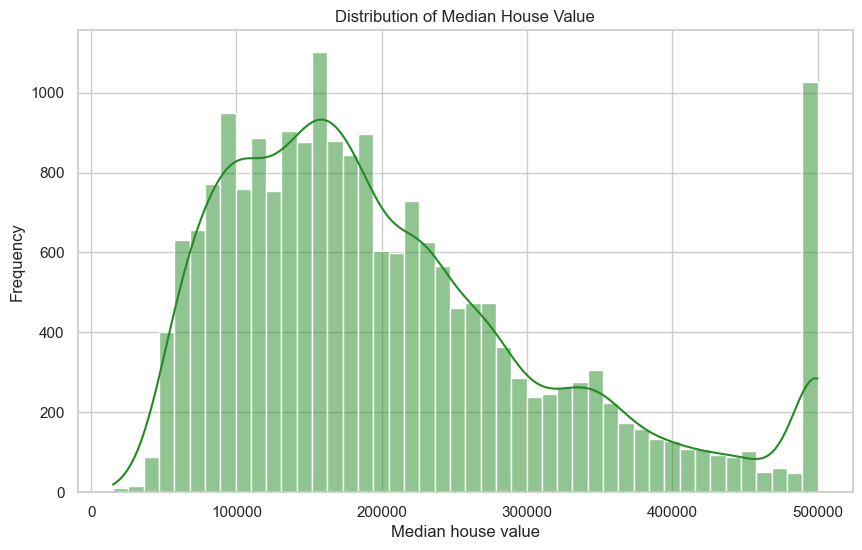

In [11]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['median_house_value'],color='forestgreen',kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median house value')
plt.ylabel('Frequency')
plt.show()

Using InterQuantile Range to Remove Outliers

In [12]:
Q1 = data_cleaned['median_house_value'].quantile(0.25)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
IQR = Q3-Q1

#Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

#check the shpae of the data before and after removal of outliers
print("Original data shape",data_cleaned.shape)
print("New data shape without outliers",data_no_outliers_1.shape)

Original data shape (20433, 10)
New data shape without outliers (19369, 10)


BoxPlot for outlier detection

Outliers in Median Income
        |
        |

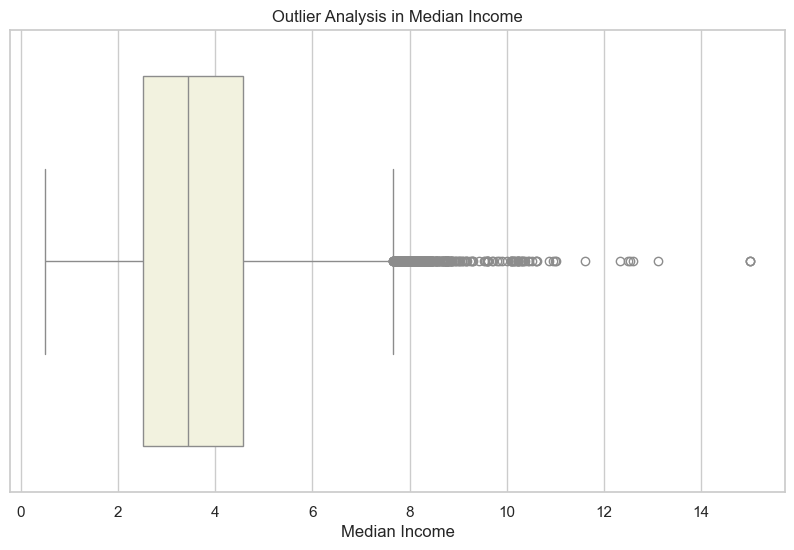

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outliers_1['median_income'],color='beige')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [14]:
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3-Q1

#Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income']>= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

#check the shpae of the data before and after removal of outliers
print("Original data shape",data_no_outliers_1.shape)
print("New data shape without outliers",data_no_outliers_2.shape)

Original data shape (19369, 10)
New data shape without outliers (19026, 10)


In [15]:
data = data_no_outliers_2
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Correlation Heatmap

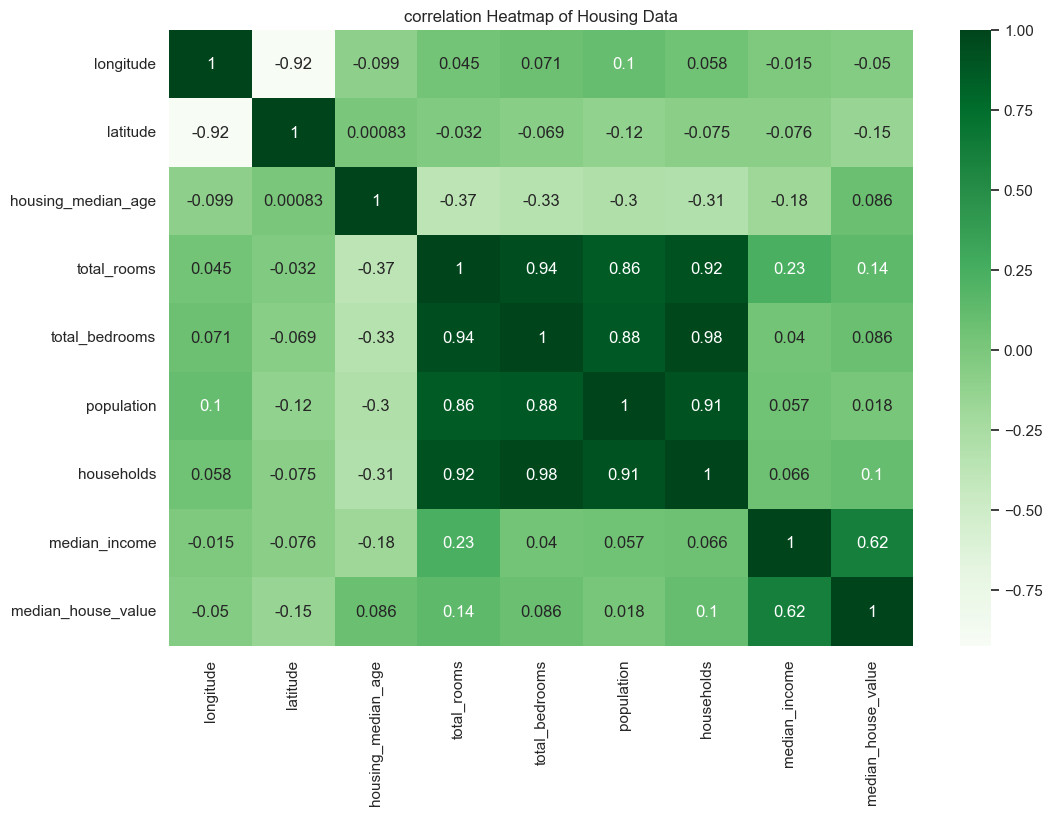

In [16]:
plt.figure(figsize=(12,8))
#data.select_dtypes(include=['number']) specifies to select only numerical to avoid conflict with string datatypes while plotting heatmaps
sns.heatmap(data.select_dtypes(include=['number']).corr(),annot=True,cmap='Greens')
plt.title('correlation Heatmap of Housing Data')
plt.show()


the total bedrooms column is being dropped below becuase it is causing high dependency with two independent variable which will cause a deviation while training the models

In [17]:
data = data.drop("total_bedrooms",axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [18]:
# Unique value count for categorical data
for column in ['ocean_proximity']:
    print(f"Unique values in {column}:",data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


String Data Categorization to Dummy variables

In [19]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity').astype(int)
data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies],axis =1)


In [20]:
print(ocean_proximity_dummies.dtypes)

ocean_proximity_<1H OCEAN     int64
ocean_proximity_INLAND        int64
ocean_proximity_ISLAND        int64
ocean_proximity_NEAR BAY      int64
ocean_proximity_NEAR OCEAN    int64
dtype: object


In [21]:
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


Split and Train Dataset

In [22]:
data = data.drop("ocean_proximity_ISLAND",axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [23]:
data.head(1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [24]:
# Define features (Independent Variables) and target (dependent variables)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data[features]
y = data[target]

# Split the data in to test and trianing
# Test size specifies what portion of data should use for training
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


Training

In [25]:
# Adding a constant to the predictors because statsmodels OLS doesn't include it by default
X_train_constant = sm.add_constant(X_train)

In [26]:
# Fit the OLS model
model_fitted = sm.OLS(y_train,X_train_constant).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.026e+32
Date:                Tue, 14 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:57:32   Log-Likelihood:             3.1101e+05
No. Observations:               15220   AIC:                        -6.220e+05
Df Residuals:                   15207   BIC:                        -6.219e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Prediction/Testing  

In [27]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)

In [28]:
test_predictions

7322     164400.0
465      196400.0
12768     65200.0
2617      73600.0
13351    195100.0
           ...   
11691    217000.0
1454     229200.0
7360     142000.0
19118    200600.0
13084    129500.0
Length: 3806, dtype: float64

Checking OLS Assumptions

Assumption 1: Linearity

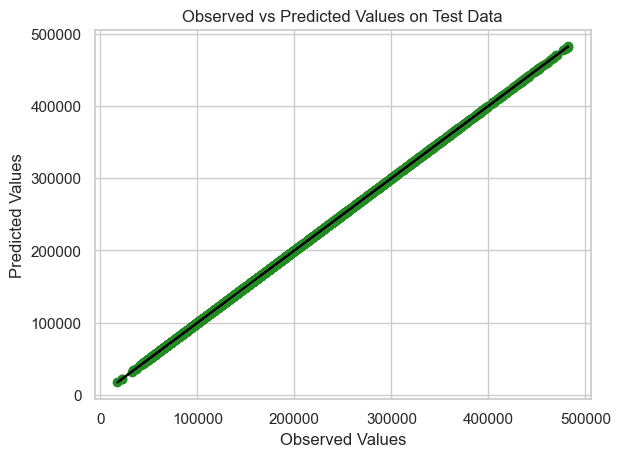

In [29]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color='forestgreen')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='black') # line for perfect prediction (true values)
plt.show()

Assumption 2: Random Sample

In [30]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is -0.0


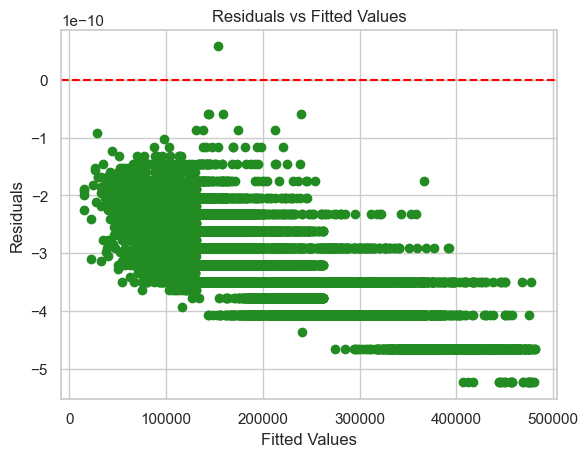

In [31]:
# Plotting residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color='forestgreen')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Assumption 3: Exogeneity

In [32]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0,1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')


Correlation between residuals and longitude: 0.13
Correlation between residuals and latitude: 0.11
Correlation between residuals and housing_median_age: -0.32
Correlation between residuals and total_rooms: 0.15
Correlation between residuals and population: 0.17
Correlation between residuals and households: 0.12
Correlation between residuals and median_income: -0.47
Correlation between residuals and median_house_value: -0.8
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.53
Correlation between residuals and ocean_proximity_INLAND: 0.81
Correlation between residuals and ocean_proximity_NEAR BAY: -0.34
Correlation between residuals and ocean_proximity_NEAR OCEAN: -0.04


Asumption 4: Homoskedasticity

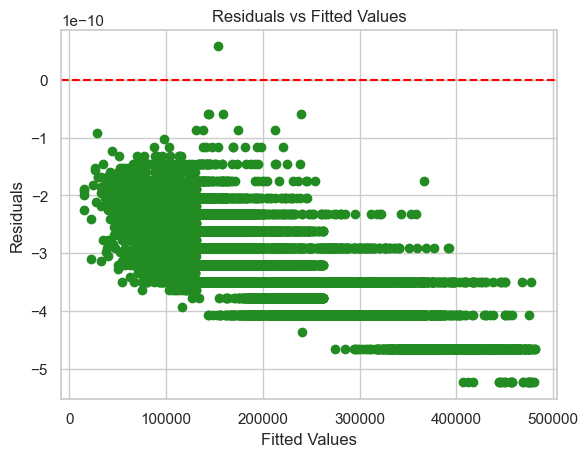

In [33]:
# Plotting residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color='forestgreen')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Train/Test/Evaluation with Sklearn


Scaling the Data

In [34]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print()

# Make the predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

#Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'MSE on Test Set: {mse}')
print(f'RMSE on Test Set: {rmse}')


MSE on Test Set: 1.2487615791746202e-20
RMSE on Test Set: 1.1174800128747808e-10


In [36]:
print(y_test,y_pred)


       median_house_value
7322             164400.0
465              196400.0
12768             65200.0
2617              73600.0
13351            195100.0
...                   ...
11691            217000.0
1454             229200.0
7360             142000.0
19118            200600.0
13084            129500.0

[3806 rows x 1 columns] [[164400.]
 [196400.]
 [ 65200.]
 ...
 [142000.]
 [200600.]
 [129500.]]


In [37]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(r2)


1.0
